Imports and Initializations

In [267]:
!cd
!C:\EnergyPlusV9-6-0\EnergyPlus -v
!C:\EnergyPlusV9-6-0\EnergyPlus -h
import os
import opyplus as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import pandas as pd
eplus_dir_path = op.get_eplus_base_dir_path((9, 6, 0))
# print("Baseline Filepath:")
# filepath1 = input()
# print("Optimized Filepath:")
# filepath2 = input()
idf_path = "C:\\Users\\chmat\\Documents\\GenOpt\\2876\\backup\\0002876.idf"
idf_path2 = "C:\\Users\\chmat\\Documents\\GenOpt\\2876\\output\\output.idf"
#idf_path3 = "C:\\Users\\chmat\\Documents\\GenOpt\\2068\\test\\test.expidf"
epw_path = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")

PricePerKwh = pd.read_excel (r'C:\\Users\\chmat\\Desktop\\THESIS\\Optimization Files\\TimeofDayPricing.xlsx')

C:\Users\chmat\Desktop\THESIS
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.13 23:05
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.13 23:05
PythonLinkage: Linked to Python Version: "3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]"
Built on Platform: Windows_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -D, --design-day             Force design-day-only simulation
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
                   

BASELINE

In [268]:
# # # run simulation
# s = op.simulate(idf_path, epw_path, "Baseline")
# print(f"status: {s.get_status()}\n")
# print(f"Eplus .err file:\n{s.get_out_err().get_content()}")
# # eso = s.get_out_eso()
# # print(eso.get_info())

OPTIMIZED

In [269]:
# # # run simulation
# s2 = op.simulate(idf_path2, epw_path, "Optimized")
# print(f"status: {s2.get_status()}\n")
# print(f"Eplus .err file:\n{s2.get_out_err().get_content()}")

TEST

In [270]:
# # # run simulation
# s3 = op.simulate(idf_path3, epw_path, "Test")
# print(f"status: {s3.get_status()}\n")
# print(f"Eplus .err file:\n{s3.get_out_err().get_content()}")

PULL DATA

In [271]:
df = pd.read_csv(idf_path[0:-3]+'csv')
df2 = pd.read_csv(idf_path2[0:-3]+'csv')
#df3 = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\1\\test\\REFBLDG1.csv')

In [272]:
df2

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),GARAGE ZONE:Zone Mean Air Temperature [C](Hourly),LIVING ZONE:Zone Mean Air Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Mean Air Temperature [C](Hourly),GARAGE ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),Heating:Electricity [J](Hourly)
0,01/01 01:00:00,-4.500,12.755360,18.358016,-5.878005,0.0,18.5,0.0,1.202363e+07
1,01/01 02:00:00,-3.000,11.629304,20.126311,-5.453926,0.0,23.5,0.0,2.160000e+07
2,01/01 03:00:00,-3.625,10.917662,20.370762,-5.247514,0.0,23.5,0.0,2.160000e+07
3,01/01 04:00:00,-2.750,10.546370,20.534573,-4.983296,0.0,22.5,0.0,2.160000e+07
4,01/01 05:00:00,-2.000,10.279856,20.722505,-4.184533,0.0,22.5,0.0,2.160000e+07
5,01/01 06:00:00,-1.375,9.949948,18.433037,-3.399379,0.0,18.5,0.0,8.302448e+06
6,01/01 07:00:00,-1.000,9.545355,20.683810,-2.903419,0.0,21.0,0.0,1.757311e+07
7,01/01 08:00:00,-1.000,9.212138,21.656587,-2.398064,0.0,23.5,0.0,2.160000e+07
8,01/01 09:00:00,-0.375,9.088816,21.644867,-0.748011,0.0,22.5,0.0,2.160000e+07
9,01/01 10:00:00,1.250,9.217250,22.091430,1.929260,0.0,23.5,0.0,2.160000e+07


In [273]:
# df = df[48:72]
# df2 = df2[48:72]
# #df3 = df3[48:72]

In [274]:
df2.keys()

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
       'GARAGE ZONE:Zone Mean Air Temperature [C](Hourly)',
       'LIVING ZONE:Zone Mean Air Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Mean Air Temperature [C](Hourly)',
       'GARAGE ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'Heating:Electricity [J](Hourly) '],
      dtype='object')

In [275]:
hours =24

ZoneT = df[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT = df["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating = df["Heating:Electricity [J](Hourly) "]
Setpoint = df["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneT2 = df2[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT2 = df2["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating2 = df2["Heating:Electricity [J](Hourly) "]
Setpoint2 = df2["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

# ZoneT3 = df3[["LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)"]]
# OutsideT3 = df3["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
# Heating3 = df3["General:Heating:Electricity [J](Hourly) "]
# Setpoint3 = df3["LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]


In [285]:
##PRICE
### Total Price for Time Period
TotPrice = np.vdot(PricePerKwh[0:hours]/3.6E6, Heating[0:hours])+5.60/31
TotPrice2 = np.vdot(PricePerKwh[0:hours]/3.6E6, Heating2[0:hours])+5.60/31


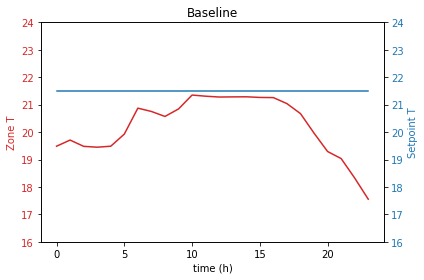

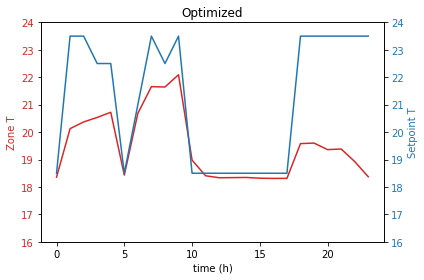

In [286]:
## BASELINE SETPOINT AND ACUTAL
t = np.arange(0, hours, 1)
data1 = ZoneT[0:hours]
data2 = Setpoint[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([16, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([16, 24])
plt.title('Baseline')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Optimized
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([16, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([16, 24])
plt.title('Optimized')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# ## Test
# t = np.arange(0, hours, 1)
# data1 = ZoneT2[0:hours]
# data2 = Setpoint2[0:hours]

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# title = "Temperature Setpoint & Actual"
# ax1.set_xlabel('time (h)')
# ax1.set_ylabel('Zone T', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim([17, 24])

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([17, 24])
# plt.title('Test')
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()



In [ ]:
##HEATING ENERGY AND PRICE COMPARIOSN
t = np.arange(1, hours, 1)
data1 = Heating[0:hours-1]/3.6E6 ##J to kWh
heatingop = Heating2[0:hours-1]/3.6E6
data2 = PricePerKwh[0:hours-1]


fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)

ax2.set_ylim([0, 0.1])
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(t,heatingop, color='pink')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# #####Optimized
# t = np.arange(1, hours, 1)
# data1 = Heating2[0:hours-1]/3.6E6 ##J to kWh
# data2 = PricePerKwh[0:hours-1]*3.4E6

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# title = "Temperature and Prices"
# ax1.set_xlabel('time (h)')
# ax1.set_ylabel('Heating kWh', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()





In [ ]:
##COMPARISON
print( 'BASELINE: ' + str(sum (Heating[0:hours]/1000000000)) + ' GJ')
print( 'BASELINE: $' + str(TotPrice))
#print( str(sum (Heating[0:hours]/3.6e6)) + 'kWh')
print( 'OPTIMIZE: ' + str(sum (Heating2[0:hours]/1000000000)) + ' GJ')
print( 'BASELINE: $' + str(TotPrice2))
#print( 'TEST: ' + str(sum (Heating3[0:hours]/1000000000)) + ' GJ')

# RATING ANOTHER SCHEDULE

In [214]:
#Schedule Rating
MaxP = TotPrice
MinP = TotPrice2
DayPrice = 1.2
PriceRating = (1-(DayPrice-MinP)/(MaxP-MinP))*5
if (PriceRating > 5):
    PriceRating=5
    
print(PriceRating)

##Comfort Rating
## Preffered point not met while occupied 
PrefT = 21
count =0

for i in range (23):
    T = ZoneT2['living_unit1,Zone Mean Air Temperature'][i]
    if (i <7 or i>17):
        if ((T-PrefT)> 1.25):
            count = count+1
print(count)  

TRating = (1-(count/24))*5
if (TRating > 5):
    TRating=5
    
print(TRating)

5


KeyError: 'living_unit1,Zone Mean Air Temperature'

In [153]:
Rating = 0.5*PriceRating + 0.5*TRating
print('RATING:' +str(Rating))

RATING:4.821158939754389
